# Линейная регрессия и стохастический градиентный спуск

Данное задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\frac{1}{\ell}\sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}(y_i - (w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$w_0 \leftarrow w_0 + \frac{2\eta}{\ell} {(y_i - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))}$$
$$w_j \leftarrow w_j + \frac{2\eta}{\ell} {x_{kj}(y_i - (w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$y = Xw$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

----

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице курса на Coursera.org.

In [6]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [7]:
import pandas as pd
import numpy as np
adver_data = pd.read_csv('data/advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [8]:
print adver_data.head(5)

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


In [9]:
adver_data.info()
adver_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy `X` из столбцов TV, Radio и Newspaper и `y` - из столбца Sales. Используйте атрибут `values` объекта pandas DataFrame.**

In [101]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data[['Sales']].values
print X[0:5,:]
print
print y[0:5]

[[ 230.1   37.8   69.2]
 [  44.5   39.3   45.1]
 [  17.2   45.9   69.3]
 [ 151.5   41.3   58.5]
 [ 180.8   10.8   58.4]]

[[ 22.1]
 [ 10.4]
 [  9.3]
 [ 18.5]
 [ 12.9]]


**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение.**

In [257]:
def normalize( train_df, type='mean-sd',verbose=False):
    mean_tmp = train_df.mean(axis = 1, skipna = True)
    print(mean_tmp)
    std_tmp = train_df.std(axis = 1, skipna = True)
    for i in range( train_df.shape[1]):
        #train_df.apply(func = lambda x: (x - mean_tmp[i])/std_tmp[i], axis = 1)
        train_df[:, i] = (np.array(train_df[:,i]) - mean_tmp[i])/ std_tmp[i]
    return train_df, mean_tmp, std_tmp
  # train_df.apply( func = lambda x: (x - mean_tmp)/sd_tmp  )

In [58]:
def normalize(train_df, type='mean-sd', verbose=False):
    mean_tmp = train_df.mean(axis=0)
    std_tmp = train_df.std(axis=0)
    if(verbose):
        # add text
        print  mean_tmp
        print  std_tmp   
    return (train_df - mean_tmp)/std_tmp;

In [102]:
# check:
X1 = normalize(train_df=X, verbose=True)
print X1.mean(axis=0)
print X1.std(axis=0)
#good

[ 147.0425   23.264    30.554 ]
[ 85.63933176  14.80964564  21.72410606]
[  1.22124533e-16  -4.52970994e-16   2.22044605e-16]
[ 1.  1.  1.]


In [103]:
means = X.mean(axis= 0)
stds = X.std(axis = 0)
print means
print stds

[ 147.0425   23.264    30.554 ]
[ 85.63933176  14.80964564  21.72410606]


In [104]:
X = (X - means)/ stds 

In [105]:
# check
print X[:,2].mean()
print X[:,1].std()

2.22044604925e-16
1.0


**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [106]:
#X1 = np.concatenate((np.ones(X.shape[0]),X), axis=0)
X =  np.hstack( (np.ones(X.shape[0]).reshape( 200, 1) , X) ) 

In [107]:
print X[0:10,]

[[ 1.          0.96985227  0.98152247  1.77894547]
 [ 1.         -1.19737623  1.08280781  0.66957876]
 [ 1.         -1.51615499  1.52846331  1.78354865]
 [ 1.          0.05204968  1.21785493  1.28640506]
 [ 1.          0.3941822  -0.84161366  1.28180188]
 [ 1.         -1.61540845  1.73103399  2.04592999]
 [ 1.         -1.04557682  0.64390467 -0.32470841]
 [ 1.         -0.31343659 -0.24740632 -0.87248699]
 [ 1.         -1.61657614 -1.42906863 -1.36042422]
 [ 1.          0.61604287 -1.39530685 -0.43058158]]


------

**2. Реализуйте функцию `mserror` - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [66]:
def mserror(y, y_pred):
    #return sum( (y - y_pred)**2);
    return np.sum( (y - y_pred)**2)/len(y);

In [131]:
def mse_error(y, y_pred):
    '''
    calculate L2 norm between 2 vectors
    args: 2 vectors with equal length
    returns: scalar (L2 norm)
    '''
    try:
        iter(y)
        iter(y_pred)
    except TypeError:
        print('y or y_pred is not vector')
    return np.sum((np.array(y) - np.array(y_pred))**2);

In [108]:
# test mserror:
y1 = np.array([1,2,3])
y2 = np.array([1,4,5])
mserror( y1, y2)

2

In [132]:
mse_error(y1, pd.Series([1, 4, 5]))

8

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [110]:
answer1 = mserror(y=y, y_pred=np.array([np.median(y)]*len(y)))
print(answer1)
write_answer_to_file(answer1, '1.txt')

5669.15


------

**3. Реализуйте функцию `normal_equation, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [111]:
def normal_equation(X, y):
    return np.dot( np.dot(np.linalg.inv( np.dot(np.transpose(X), X) ), np.transpose(X)), y )
# numpy.linalg.pinv could be used for calculatinf (X^t * X)^(-1)*X^t matrix

In [112]:
#X_tmp = np.dot(np.linalg.inv( np.dot(np.transpose(X), X) ), np.transpose(X))
#print type(X)
#print type(X_tmp)
#rint X_tmp.shape
#print (y.transpose()).shape 

In [113]:
#np.dot(X[0:10, :], np.array([1, 2, 3, 4]))

In [114]:
norm_eq_weights = normal_equation(X, y)
print (norm_eq_weights)

[[ 14.0225    ]
 [  3.91925365]
 [  2.79206274]
 [ -0.02253861]]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [115]:
answer2 = norm_eq_weights[0]
print(answer2)
write_answer_to_file(answer2, '2.txt')

[ 14.0225]


-------

**4. Напишите функцию `linear_prediction`, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [116]:
def linear_prediction(X, w):
    return np.dot(X, w)

In [117]:
a = linear_prediction(X, w = norm_eq_weights)
print a.shape

(200L, 1L)


**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [118]:
answer3 = mserror(y=y, y_pred=linear_prediction(X=X, w=norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.78412631451


**5. Напишите функцию `stochastic_gradient_step`, реализующую шаг стохастического градиентного спуска для линейной регрессии.**

Функция должна принимать матрицу `X`, вектора `y` и `w`, число *$\eta$* (eta) - шаг градиентного спуска (пусть по умолчанию `eta=0.01`), а также число `train_ind` - индекс объекта обучающей выборки (строки матрицы `X`), по которому считается изменение весов. Результатом будет вектор обновленных весов.

In [216]:
def stochastic_gradient_step(X, y, w, eta, train_ind):
    l = len(y)
    x = X[train_ind,:]
    w_tmp  = np.zeros(len(w))
    for i in range(len(w)):
        w_tmp[i] = w[i]  - (2*eta/l)*(np.dot(x, w) - y[train_ind])*x[i]
    return  w_tmp

In [217]:
def stochastic_gradient_step_optimize(X, y, w, eta, train_ind):
    x = X[train_ind,:]
    return  w - (2*eta/len(y))*(np.dot(x, w) - y[train_ind]) * x

In [218]:
#works
stochastic_gradient_step(X, y, np.array([1, 2, 3, 4]), 0.01, 20)

array([ 1.00102284,  2.00085226,  3.00030637,  4.00107566])

In [219]:
stochastic_gradient_step_optimize(X, y, [1, 2, 3, 4], 0.01, 20)

array([ 1.00102284,  2.00085226,  3.00030637,  4.00107566])

In [125]:
# check:
A = np.array([1,2,2,3]).reshape(2,2)
b = np.array([1,1])
#print A
print stochastic_gradient_step_optimize(X=A, y=b, w=[1,0], eta=0.1, train_ind=1)
print
print stochastic_gradient_step(X=A, y=b, w=[1,0], eta=0.1, train_ind=1)
#good

[ 0.8 -0.3]

[ 0.8 -0.3]


------

**6. Напишите функцию `stochastic_gradient_descent`, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- `X` - матрица, соответствующая обучающей выборке
- `y` - вектор значений целевого признака
- `w_init` - вектор начальных весов модели
- `stochastic` - флаг, соответствующий варианту градиентного спуска - стохастическому или нет (по умолчанию `False`)
- `eta` - шаг градиентного спуска (по умолчанию 0.01)
- `max_iter` - максимальное число итераций градиентного спуска (по умолчанию 10000)
- `max_weight_dist` - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска, при котором алгоритм прекращает работу (по умолчанию `1e-8`)
- `verbose` - флаг печати информации (например, для отладки, по умолчанию `False`)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [220]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, 
                     min_weight_dist=1e-8,
                     seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать случайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности случайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем случайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        #w_new = stochastic_gradient_step(X=X, y=y, w=w, eta=eta, train_ind=random_ind)
        w_new = stochastic_gradient_step(X, y, w,eta,train_ind=random_ind)
        weight_dist = mserror(w_new, w)
        #print weight_dist
        w = w_new
        #print weight_dist
        errors.append(mserror(y=y, y_pred=linear_prediction(X=X, w=w)))
        iter_num += 1    
    return w, errors

In [234]:
10^5

15

 **Запустите $10^5$ (!) итераций стохастического градиентного спуска. Используйте длину шага $\eta$=0.01 и вектор начальных весов, состоящий из нулей.**

In [242]:
%%time
for i in range(10):
    stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init=np.zeros(4), eta=1e-2)

Wall time: 1.23 s


Populating the interactive namespace from numpy and matplotlib


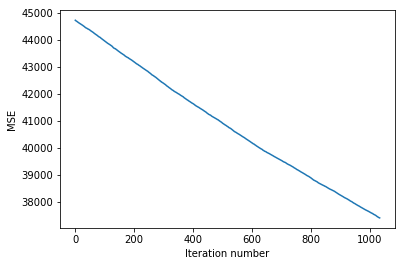

In [243]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [238]:
stoch_grad_desc_weights

array([ 1.38645161,  0.4215173 ,  0.25063889,  0.08749116])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [229]:
stoch_errors_by_iter[-1]

37406.980643919669

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [230]:
answer4 = mse_error(y=y, y_pred=linear_prediction(X=X, w=stoch_grad_desc_weights))
print(answer4)
#write_answer_to_file(answer4, '4.txt')

7481396.12878


In [244]:
35848+105964

141812

-----

Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.